In [1]:
sc.version

u'1.6.0'

In [2]:
sqlContext=SQLContext(sc)

In [3]:

cloudantdata=sqlContext.read.format("com.cloudant.spark").\
option("cloudant.host","86d043e2-f688-4b33-9b2d-65537f831214-bluemix.cloudant.com").\
option("cloudant.username", "86d043e2-f688-4b33-9b2d-65537f831214-bluemix").\
option("cloudant.password", "3577f8262a62fd0f62bf1bc1394271f8a63e199d58c5b81768da6a3d32e74656").\
load("recipedb")

In [4]:
cloudantdata.printSchema()

root
 |-- _id: string (nullable = true)
 |-- _rev: string (nullable = true)
 |-- forecast: double (nullable = true)
 |-- name: string (nullable = true)
 |-- temperature: double (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- wzscore: double (nullable = true)
 |-- zscore: double (nullable = true)



In [5]:
cloudantdata.take(1)

[Row(_id=u'0001683791e04032a4ca0955b70b12f8', _rev=u'1-e1fac6e387132edcb0450c7b2f26d35b', forecast=17.530496368661147, name=u'datacenter', temperature=17.53, timestamp=u'2016-Mar-14 14:28:00', wzscore=-0.3973792127656496, zscore=-0.062204879122082946)]

In [6]:
cloudantdata.count()

33980

In [7]:
cloudantdata.select("temperature").show()

+-----------+
|temperature|
+-----------+
|      17.53|
|      17.47|
|       17.5|
|      17.21|
|       17.5|
|      17.31|
|      18.56|
|      17.66|
|     17.595|
|     18.595|
|      16.88|
|       16.5|
|      18.66|
|      16.56|
|       18.5|
|     16.625|
|      17.13|
|      17.25|
|     17.595|
|     17.845|
+-----------+
only showing top 20 rows



In [8]:
import pprint
import pandas as pd
pandaDF = cloudantdata.toPandas()
pandaDF


,_id,_rev,forecast,name,temperature,timestamp,wzscore,zscore
0,0001683791e04032a4ca0955b70b12f8,1-e1fac6e387132edcb0450c7b2f26d35b,17.530496,datacenter,17.530,2016-Mar-14 14:28:00,-0.397379,-0.062205
1,000466810f774d13849ef51aada02b69,1-86b2d61725df63293474e976063e84f9,17.410067,datacenter,17.470,2016-Feb-29 19:22:00,0.292134,0.246648
2,0004fef3c82f4f23a36f6aef63417c88,1-725360471a4d542cacba68d53814556b,17.470097,datacenter,17.500,2016-Feb-20 03:30:00,0.482909,-0.293288
3,0005c9331e3b4a879abe1aba23724110,1-de5a76b4d2cabf24ca209a57f4a0e296,17.117950,datacenter,17.210,2016-Feb-28 11:00:00,1.005736,0.523901
4,0005f46182c74b74b3ac9fc776b58253,1-3556a2d4480a72073210b216060e2de2,18.031236,datacenter,17.500,2016-Feb-29 17:26:00,-1.610983,-2.873065
5,0009d043461e469f95d6b9c7513eca47,1-93f94fb59f5099900822df4e8280d5eb,17.225300,datacenter,17.310,2016-Mar-26 15:08:00,0.875406,0.443755
6,000a72b4c9ac454e92cac2a8b52528d6,1-892f78041d56b6fcbe7edc21f995b72a,18.552503,datacenter,18.560,2016-Mar-18 00:44:00,-0.594332,-0.109969
7,000dd83937354e0fb8a9afd5259bbae4,1-f17afaa1a001d758bc589b0bb94e3a71,17.500381,datacenter,17.660,2016-Mar-09 15:28:00,1.254255,1.163229
8,000e81ea5b6b4b0abc3eb63d5a8dedf3,1-7b67479d40c1d3e183b72e5db1429650,17.560312,datacenter,17.595,2016-Mar-30 03:18:00,0.128481,0.004032
9,00140c99833a43148c6f8c500bfb08cb,1-6d2040a7144fb7f41530f1c8594bf3b3,18.540539,datacenter,18.595,2016-Mar-24 19:38:00,0.939344,0.158313


In [9]:
len(pandaDF)

33980

In [10]:
pandaDF.columns

Index([u'_id', u'_rev', u'forecast', u'name', u'temperature', u'timestamp', u'wzscore', u'zscore'], dtype='object')

In [11]:
pandaDF["temperature"]

0     17.530
1     17.470
2     17.500
3     17.210
4     17.500
5     17.310
6     18.560
7     17.660
8     17.595
9     18.595
10    16.880
11    16.500
12    18.660
13    16.560
14    18.500
...
33965    17.560
33966    17.650
33967    18.560
33968    18.560
33969    17.595
33970    17.660
33971    17.380
33972    17.690
33973    18.660
33974    17.660
33975    16.030
33976    18.250
33977    17.560
33978    18.030
33979    18.720
Name: temperature, Length: 33980, dtype: float64

In [12]:
pandaDF[["timestamp","temperature"]]

,timestamp,temperature
0,2016-Mar-14 14:28:00,17.530
1,2016-Feb-29 19:22:00,17.470
2,2016-Feb-20 03:30:00,17.500
3,2016-Feb-28 11:00:00,17.210
4,2016-Feb-29 17:26:00,17.500
5,2016-Mar-26 15:08:00,17.310
6,2016-Mar-18 00:44:00,18.560
7,2016-Mar-09 15:28:00,17.660
8,2016-Mar-30 03:18:00,17.595
9,2016-Mar-24 19:38:00,18.595


In [13]:
pandaDF.temperature

0     17.530
1     17.470
2     17.500
3     17.210
4     17.500
5     17.310
6     18.560
7     17.660
8     17.595
9     18.595
10    16.880
11    16.500
12    18.660
13    16.560
14    18.500
...
33965    17.560
33966    17.650
33967    18.560
33968    18.560
33969    17.595
33970    17.660
33971    17.380
33972    17.690
33973    18.660
33974    17.660
33975    16.030
33976    18.250
33977    17.560
33978    18.030
33979    18.720
Name: temperature, Length: 33980, dtype: float64

In [14]:
pandaDF.std()

forecast       0.570210
temperature    0.582122
wzscore        1.313706
zscore         1.298055
dtype: float64

In [15]:
# find the maximum temperature
maximum = pandaDF.temperature.max()
maximum

19.780000000000001

In [16]:
first_date = pandaDF.timestamp.values[0]
first_date

u'2016-Mar-14 14:28:00'

In [17]:
from datetime import datetime
datetime.strptime(first_date, "%Y-%b-%d %H:%M:%S")

datetime.datetime(2016, 3, 14, 14, 28)

In [18]:
from datetime import datetime
# convert the time from string to panda's datetime
pandaDF.timestamp = pandaDF.timestamp.apply(lambda d: datetime.strptime(d, "%Y-%b-%d %H:%M:%S"))
pandaDF.index = pandaDF.timestamp

# Drop the timestamp column as the index is replaced with timestamp now
pandaDF = pandaDF.drop(["timestamp"], axis=1)
pandaDF.head()

# Also, sort the index with the timestamp
pandaDF.sort_index(inplace=True)

In [19]:
# One can query the temperature based on the datetime, 
# incase if you are not sure about the exact time, then use searchsorted() method to get to the
# nearest date
date = pandaDF.index.searchsorted(datetime(2016, 2, 18, 17, 44, 23))
pandaDF.ix[date]

_id              4d5306615f5a416e97921b3b70b75ab7
_rev           1-29ae6dc3d931fdeea1d9d20e5d50c5b8
forecast                                 17.61406
name                                   datacenter
temperature                                 17.69
wzscore                                  1.695702
zscore                                  0.3832717
Name: 2016-02-18 17:46:00, dtype: object

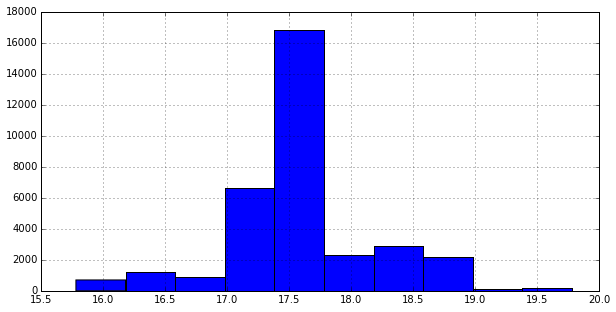

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

pandaDF.temperature.hist(figsize=(10, 5))

In [21]:
pandaDF['timestamp'] = pandaDF.index


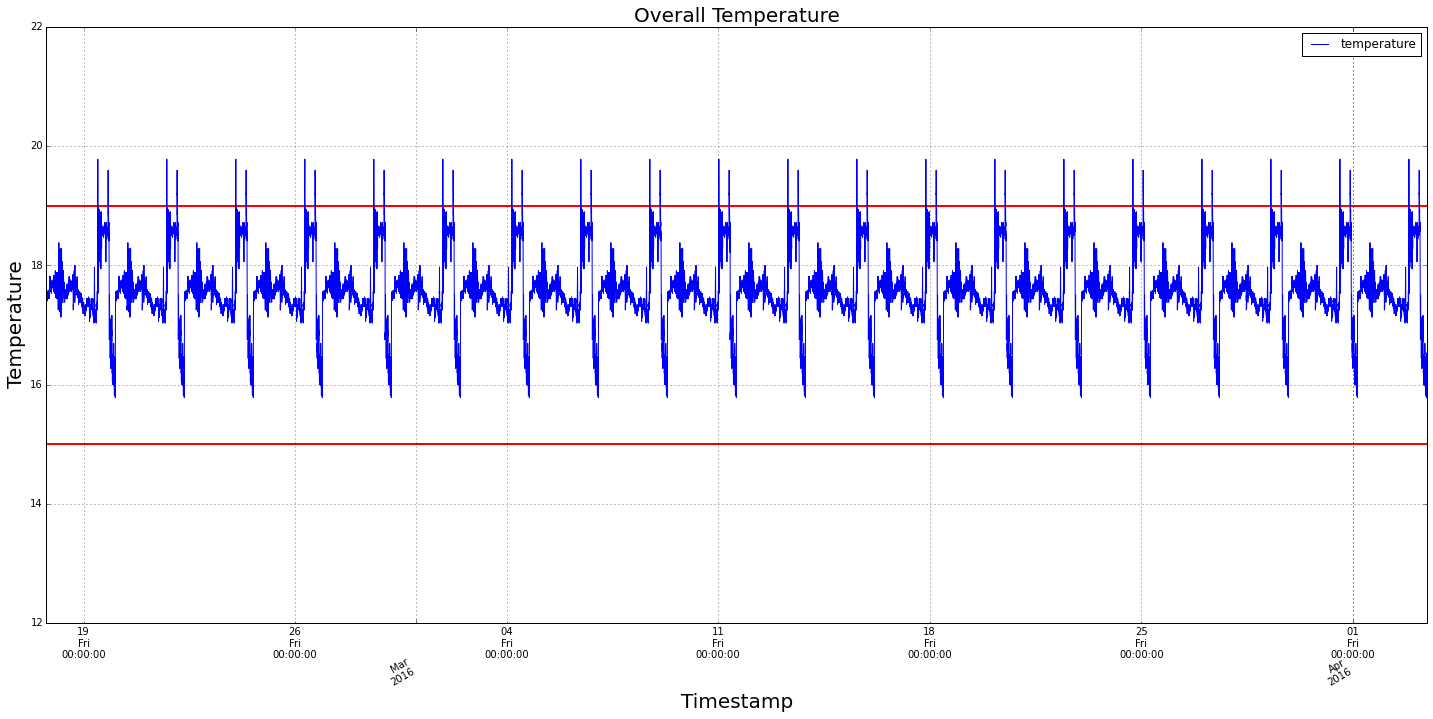

In [22]:
# Draw overall temperature
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plotDF = pandaDF[['temperature']]

import matplotlib.dates as dates

fig, ax = plt.subplots()
plotDF.plot(figsize=[20,10], ax=ax, grid=True)
ax.set_xlabel("Timestamp",fontsize=20)
ax.set_ylabel("Temperature",fontsize=20)
ax.set_title("Overall Temperature", fontsize=20)
ax.set_ylim([12,22])
# Draw lines to showcase the upper and lower threshold
ax.axhline(y=19,c="red",linewidth=2,zorder=0)
ax.axhline(y=15,c="red",linewidth=2,zorder=0)
ax.xaxis.set_minor_locator(dates.AutoDateLocator(tz=None, minticks=5, maxticks=None, interval_multiples=False))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a\n%H:%M:%S'))
ax.xaxis.grid(True, which="minor")
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

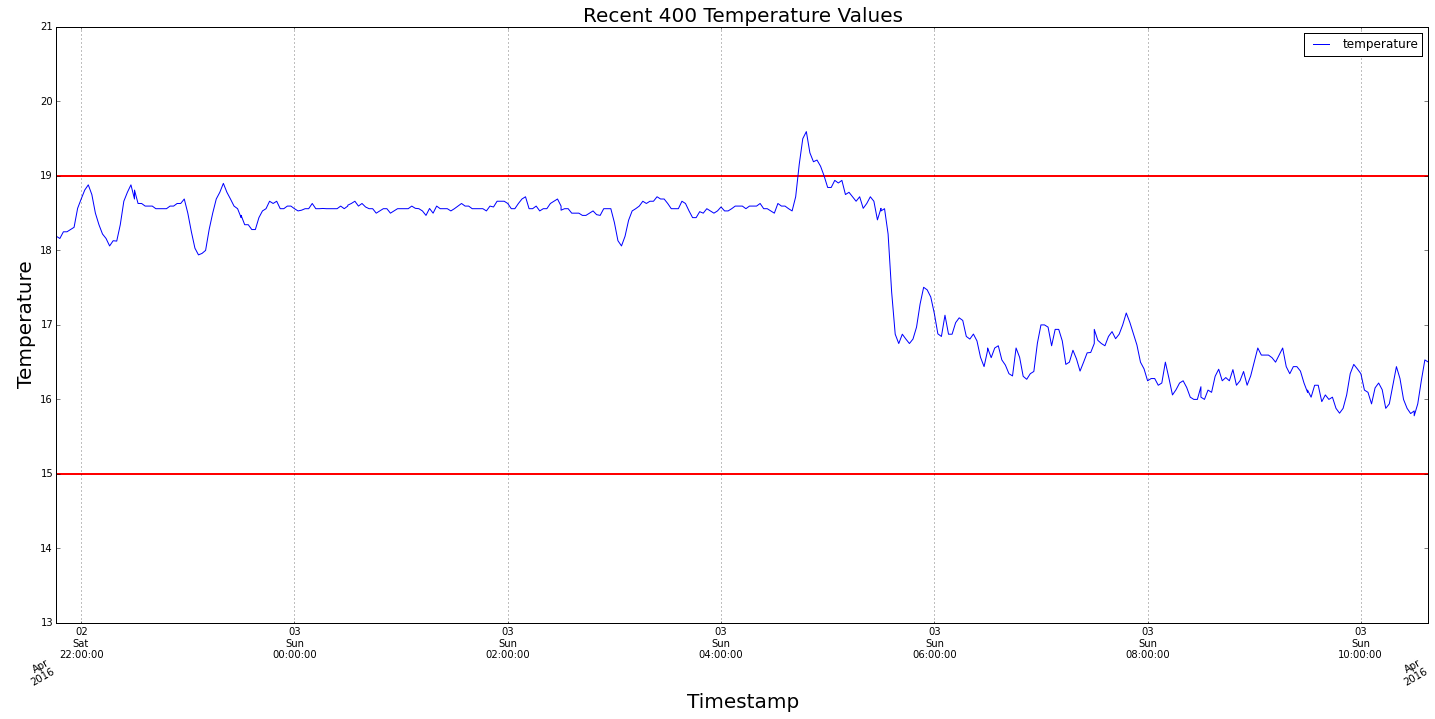

In [23]:
# Draw Last 400 temperature values
plotDF = pandaDF[['temperature']]
fig, ax = plt.subplots()

plotDF.tail(400).plot(figsize=[20,10], ax=ax, grid=True)
ax.set_xlabel("Timestamp",fontsize=20)
ax.set_ylabel("Temperature",fontsize=20)
ax.set_title("Recent 400 Temperature Values", fontsize=20)
ax.set_ylim([13,21])
ax.axhline(y=19,c="red",linewidth=2,zorder=0)
ax.axhline(y=15,c="red",linewidth=2,zorder=0)
ax.xaxis.set_minor_locator(dates.AutoDateLocator(tz=None, minticks=5, maxticks=None, interval_multiples=False))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a\n%H:%M:%S'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

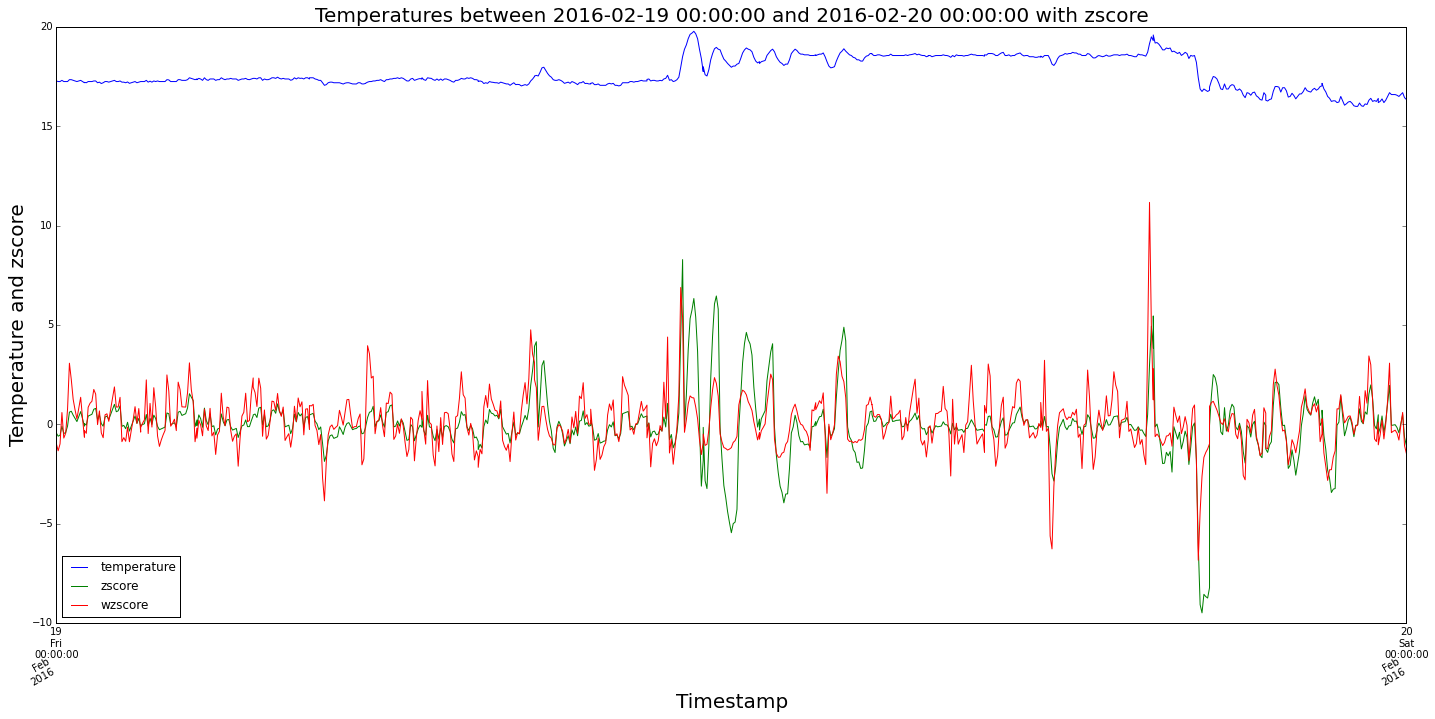

In [24]:
# Draw temperature chart with normal zscore & wzscore
start = datetime(2016, 2, 19)
end = datetime(2016, 2, 20)
plotDF = pandaDF.ix[start:end]
plotDF = plotDF[['temperature','zscore','wzscore']]
fig, ax = plt.subplots()
plotDF.plot(figsize=[20,10], ax=ax, grid=True)
# format the axis
ax.set_xlabel("Timestamp",fontsize=20)
ax.set_ylabel("Temperature and zscore",fontsize=20)
ax.set_title("Temperatures between " + str(start) + " and " + str(end) + " with zscore", fontsize=20)
ax.xaxis.set_minor_locator(dates.AutoDateLocator(tz=None, minticks=1, maxticks=None, interval_multiples=False))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a\n%H:%M:%S'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

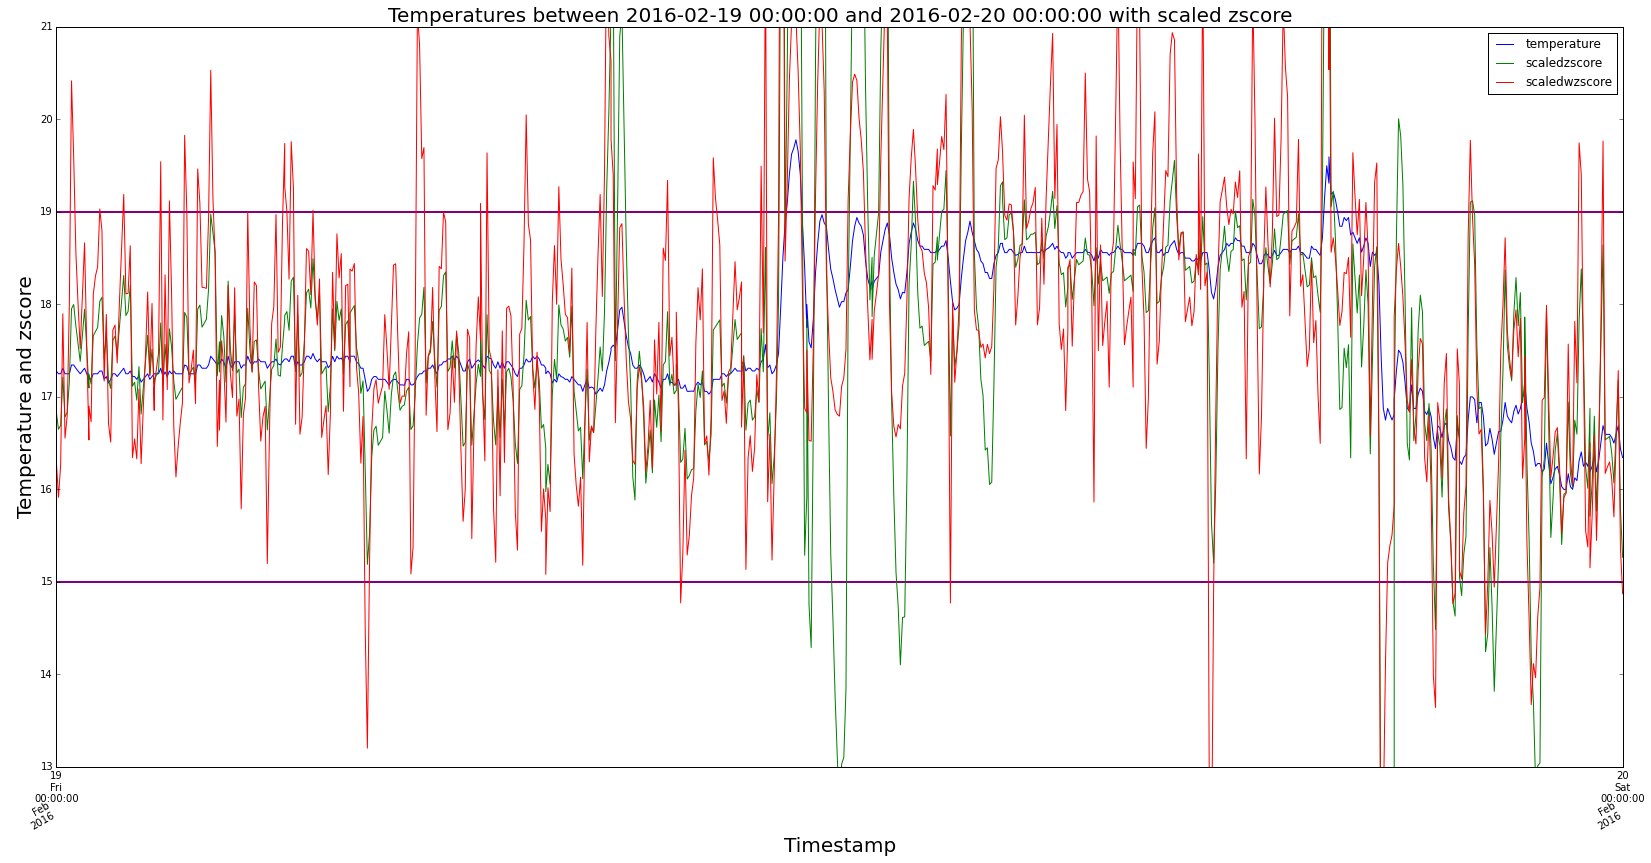

In [25]:
# Draw temperature chart with scaled zscore & wzscore

# define a method that scales zscore with the temperature
def scaleZscore(row):
    return row['zscore'] + row['temperature']

# define a method that scales wzscore with the temperature
def scaleWZscore(row):
    return row['wzscore'] + row['temperature']

# apply the functions
pandaDF['scaledzscore'] = pandaDF.apply(scaleZscore, axis=1)
pandaDF['scaledwzscore'] = pandaDF.apply(scaleWZscore, axis=1)

start = datetime(2016, 2, 19)
end = datetime(2016, 2, 20)
plotDF = pandaDF.ix[start:end]

# create a dataframe with a required fields that we want to plot
plotDF = plotDF[['temperature','scaledzscore','scaledwzscore']]

fig, ax = plt.subplots()

plotDF.plot(figsize=[23,12], ax=ax)

ax.set_xlabel("Timestamp",fontsize=20)
ax.set_ylabel("Temperature and zscore",fontsize=20)
ax.set_title("Temperatures between " + str(start) + " and " + str(end) + " with scaled zscore", fontsize=20)
ax.xaxis.set_minor_locator(dates.AutoDateLocator(tz=None, minticks=1, maxticks=None, interval_multiples=True))
ax.axhline(y=19,c="purple",linewidth=2,zorder=0)
ax.axhline(y=15,c="purple",linewidth=2,zorder=0)
ax.set_ylim([13,21])
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a\n%H:%M:%S'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

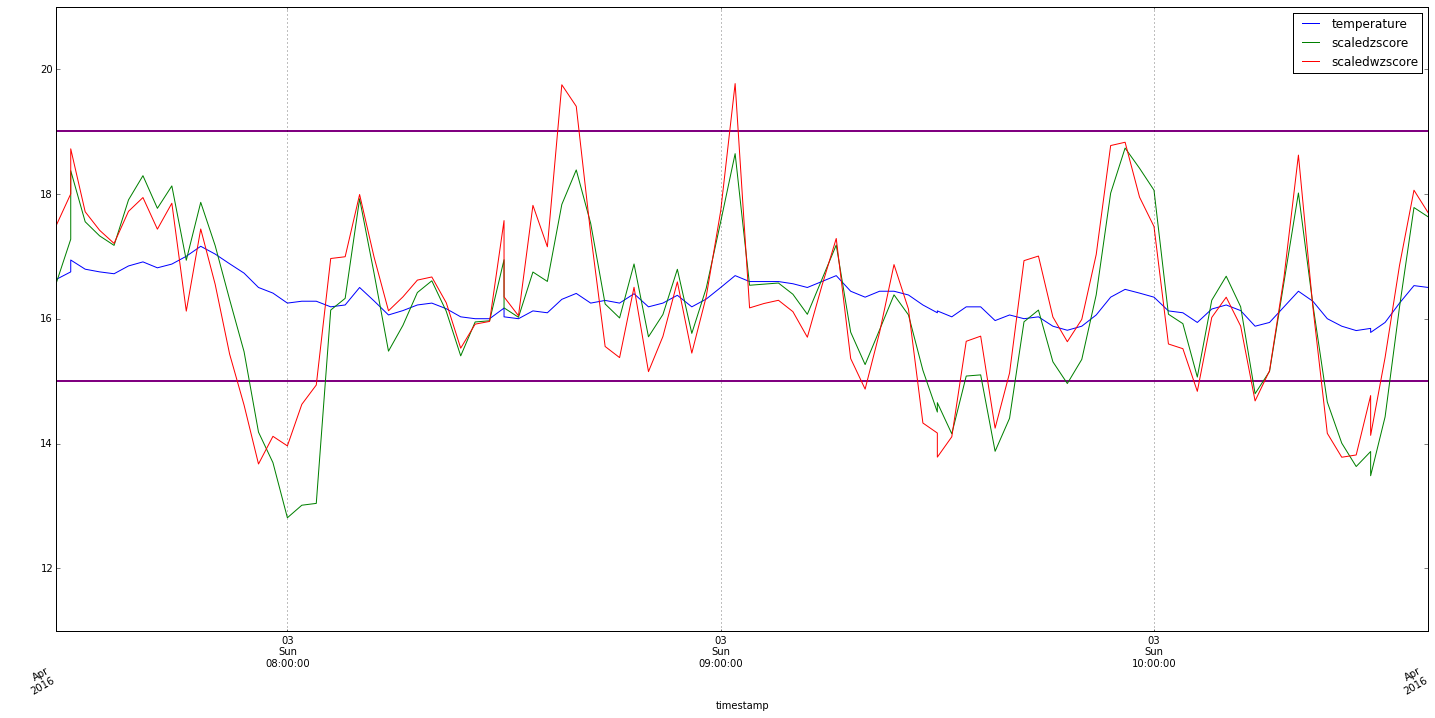

In [26]:
def scaleZscore(row):
    return row['zscore'] + row['temperature']

def scaleWZscore(row):
    return row['wzscore'] + row['temperature']

pandaDF['scaledzscore'] = pandaDF.apply(scaleZscore, axis=1)
pandaDF['scaledwzscore'] = pandaDF.apply(scaleWZscore, axis=1)

plotDF = pandaDF[['temperature','scaledzscore','scaledwzscore']]

import matplotlib.dates as dates

fig, ax = plt.subplots()

plotDF.tail(100).plot(figsize=[20,10], ax=ax)

ax.xaxis.set_minor_locator(dates.AutoDateLocator(tz=None, minticks=1, maxticks=None, interval_multiples=True))
ax.axhline(y=19,c="purple",linewidth=2,zorder=0)
ax.axhline(y=15,c="purple",linewidth=2,zorder=0)
ax.set_ylim([11,21])
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a\n%H:%M:%S'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

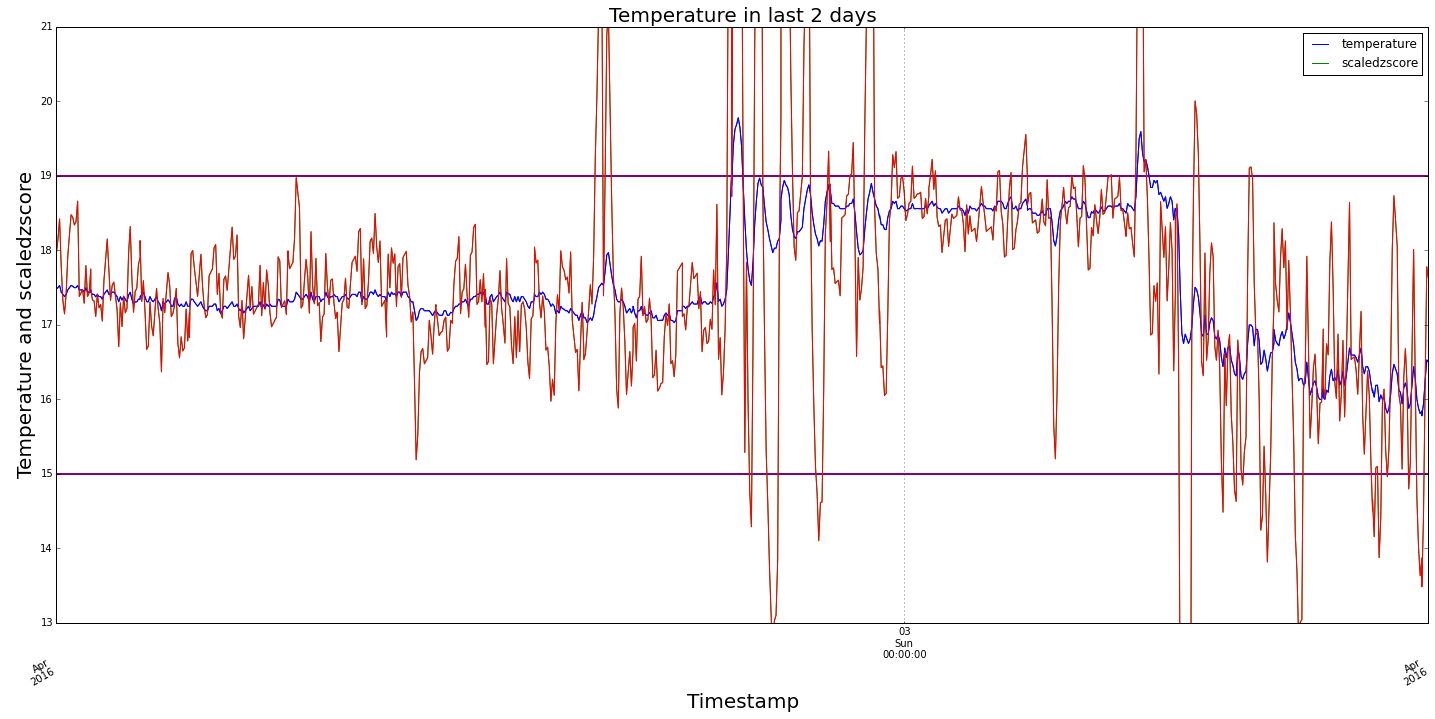

In [27]:
from datetime import *
import pytz

# retrieve the current temperature
now = datetime.now(pytz.timezone('UTC'))

# get the start time that will be behind 2 days from now, just modify "days = 2" to "hours=2" in case if
# you want to retrieve the temperature from last 2 hours

last_n_days = now - timedelta(days=23)

plotDF = pandaDF.ix[last_n_days:now]
plotDF = plotDF[['temperature','scaledzscore']]
fig, ax = plt.subplots()

plotDF.plot(figsize=[20,10], ax=ax)
# choose the colours for each column
with pd.plot_params.use('x_compat', True):
   plotDF.temperature.plot(color='b')
   plotDF.scaledzscore.plot(color='r');

ax.set_xlabel("Timestamp",fontsize=20)
ax.set_ylabel("Temperature and scaledzscore",fontsize=20)
ax.set_title("Temperature in last 2 days", fontsize=20)
    
ax.xaxis.set_minor_locator(dates.AutoDateLocator(tz=None, minticks=1, maxticks=None, interval_multiples=True))
ax.axhline(y=19,c="purple",linewidth=2,zorder=0)
ax.axhline(y=15,c="purple",linewidth=2,zorder=0)
ax.set_ylim([13,21])
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a\n%H:%M:%S'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()

In [28]:
# find the maximum temperature
maximum = pandaDF.temperature.max()
maximum

19.780000000000001

In [29]:
threshold_crossed_days = pandaDF[pandaDF.temperature > 19.5]
threshold_crossed_days

,_id,_rev,forecast,name,temperature,wzscore,zscore,timestamp,scaledzscore,scaledwzscore
timestamp,,,,,,,,,,
2016-02-19 11:16:00,6250a57ac0854dfca004f8f4e8b17812,1-d7258f4b02c11da53afb387f7af6f177,18.859081,datacenter,19.625,1.426385,5.316136,2016-02-19 11:16:00,24.941136,21.051385
2016-02-19 11:18:00,bcfe32c0eb44495cb294b58dad9b9e69,1-ca24c64a60617e38fb6489ea0808ffe8,18.855104,datacenter,19.690,1.337987,5.745346,2016-02-19 11:18:00,25.435346,21.027987
2016-02-19 11:20:00,177b8cfb95984794b9c134e589d0a1ed,1-4eabb07da5ecbdb326bb6f112f0f2852,18.851127,datacenter,19.780,1.324568,6.328538,2016-02-19 11:20:00,26.108538,21.104568
2016-02-19 11:22:00,23f2aa9d1d82429d945ea2ad37dc6176,1-80a1caab1b7fe338b536239859f8dd3e,18.847151,datacenter,19.655,0.867777,5.392459,2016-02-19 11:22:00,25.047459,20.522777
2016-02-19 19:30:00,45de7b81152b40c4b73f1a478644d9a9,1-20adee83a18767bb4cf9a7a7521bf878,18.599451,datacenter,19.595,2.796950,5.450707,2016-02-19 19:30:00,25.045707,22.391950
2016-02-21 18:04:00,be7b7428c4704fe29d6af53b8bfac21c,1-af43bf4c4710d7b6896b976785a8e375,18.859081,datacenter,19.625,1.426385,5.316136,2016-02-21 18:04:00,24.941136,21.051385
2016-02-21 18:06:00,6cb7fe0879c74b1195763128a238eee9,1-55308fb4835b52f760e8f87a57be5640,18.855104,datacenter,19.690,1.337987,5.745346,2016-02-21 18:06:00,25.435346,21.027987
2016-02-21 18:08:00,68d4afd251f8482b991e11d35b0a5b20,1-9d3d8bcb7387159c251c42816656fa48,18.851127,datacenter,19.780,1.324568,6.328538,2016-02-21 18:08:00,26.108538,21.104568
2016-02-21 18:10:00,1ae586a118a34af48ae3b7791495a689,1-a01a5ef576eee26b9e7e663914774bd2,18.847151,datacenter,19.655,0.867777,5.392459,2016-02-21 18:10:00,25.047459,20.522777


In [30]:
threshold_crossed_days['timestamp'] = threshold_crossed_days.index
days = threshold_crossed_days.timestamp.map(lambda t: t.date()).unique()
print "Number of times the threshold is crossed: " + str(threshold_crossed_days.temperature.count())
print "The days are --> " + str(days)

Number of times the threshold is crossed: 100
The days are --> [datetime.date(2016, 2, 19) datetime.date(2016, 2, 21)
 datetime.date(2016, 2, 22) datetime.date(2016, 2, 24)
 datetime.date(2016, 2, 26) datetime.date(2016, 2, 28)
 datetime.date(2016, 3, 1) datetime.date(2016, 3, 2)
 datetime.date(2016, 3, 4) datetime.date(2016, 3, 6)
 datetime.date(2016, 3, 8) datetime.date(2016, 3, 9)
 datetime.date(2016, 3, 11) datetime.date(2016, 3, 13)
 datetime.date(2016, 3, 15) datetime.date(2016, 3, 17)
 datetime.date(2016, 3, 18) datetime.date(2016, 3, 20)
 datetime.date(2016, 3, 22) datetime.date(2016, 3, 24)
 datetime.date(2016, 3, 25) datetime.date(2016, 3, 27)
 datetime.date(2016, 3, 29) datetime.date(2016, 3, 31)
 datetime.date(2016, 4, 2) datetime.date(2016, 4, 3)]


/usr/local/src/bluemix_ipythonspark_16/notebook-2.7/lib/python2.7/site-packages/ipython-3.2.1-py2.7.egg/IPython/kernel/__main__.py:1: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  if __name__ == '__main__':


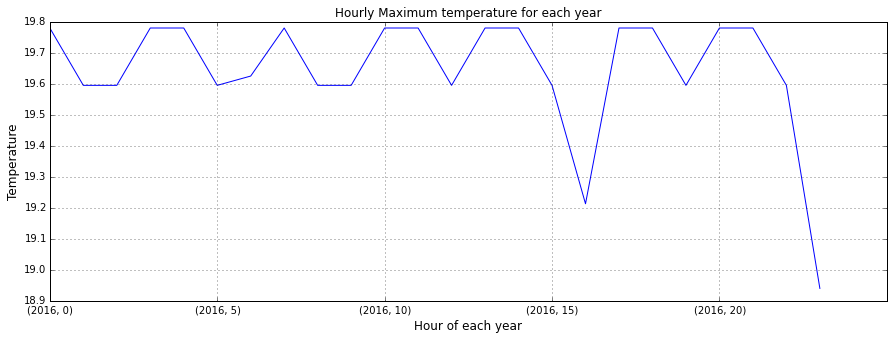

In [31]:
# Find out hourly maximum temperature for each year
year_hour_max = pandaDF.groupby(lambda x: (x.year, x.hour)).max()

fig, ax = plt.subplots()
plotDF = year_hour_max[['temperature']]
plotDF.temperature.plot(figsize=(15,5), ax=ax, title='Hourly Maximum temperature for each year')
ax.set_xlabel("Hour of each year",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()

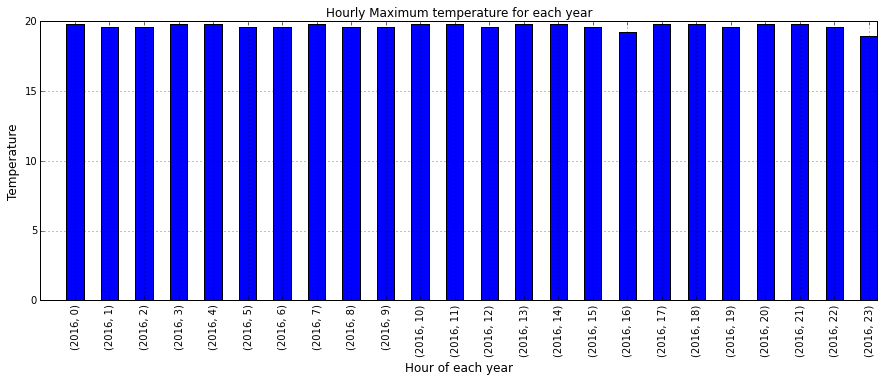

In [32]:
# draw a bar chart for hourly maximum temperature
fig, ax = plt.subplots()
plotDF.temperature.plot(kind='bar',figsize=(15,5), ax=ax, title='Hourly Maximum temperature for each year')
ax.set_xlabel("Hour of each year",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()

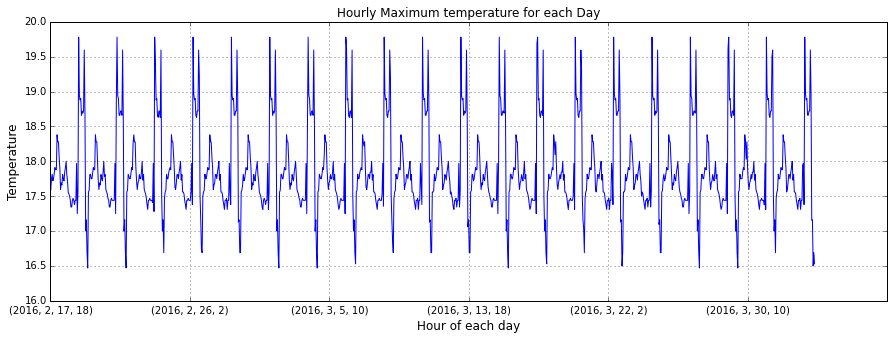

In [33]:
# Find out hourly maximum temperature for each day
each_hour_max = pandaDF.groupby(lambda x: (x.year, x.month, x.day, x.hour)).max()

fig, ax = plt.subplots()
plotDF = each_hour_max[['temperature']]
plotDF.temperature.plot(figsize=(15,5), ax=ax, title='Hourly Maximum temperature for each Day')
ax.set_xlabel("Hour of each day",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()

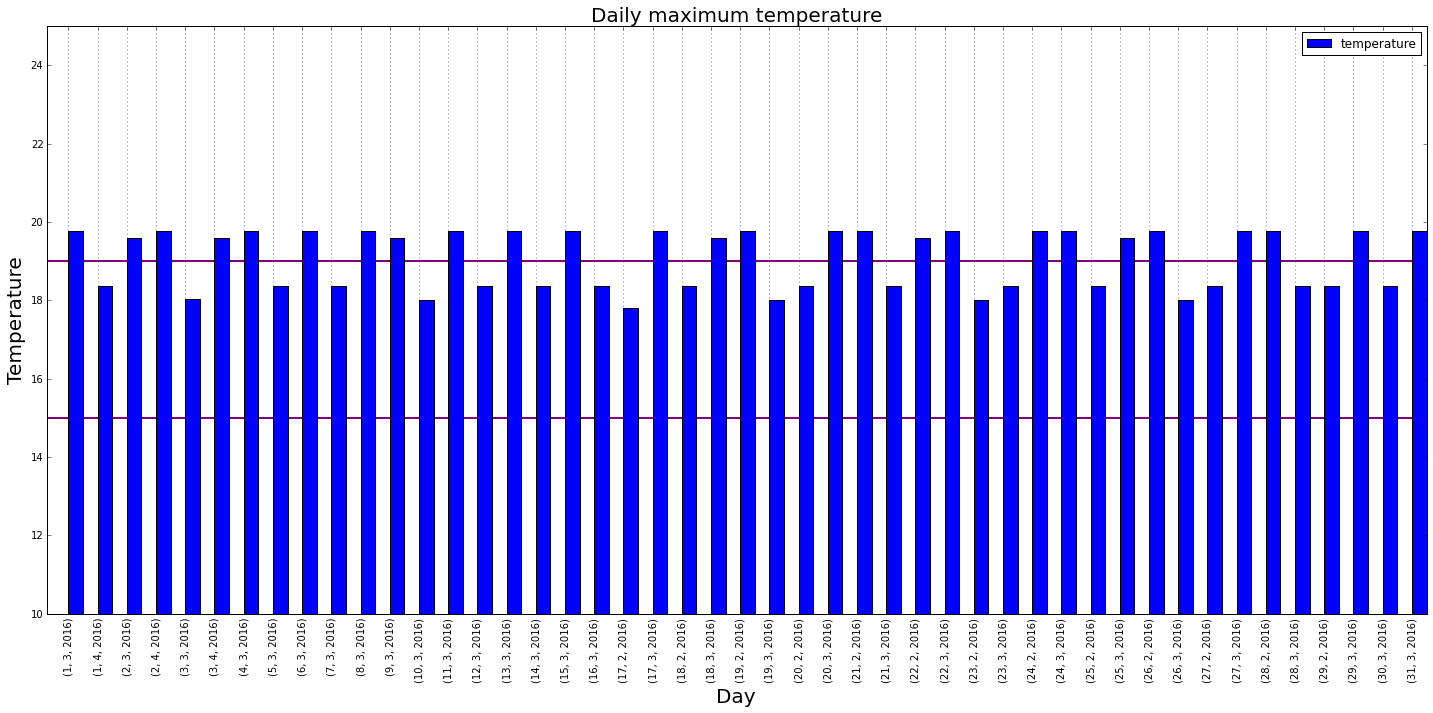

In [34]:
# Maximum temperature of each Day
df = pandaDF

df = df.drop(["_id"], axis=1)
df = df.drop(["_rev"], axis=1)
df = df.drop(["scaledzscore"], axis=1)
df = df.drop(["scaledwzscore"], axis=1)
df = df.drop(["timestamp"], axis=1)
df = df.drop(["forecast"], axis=1)
df = df.drop(["zscore"], axis=1)
df = df.drop(["wzscore"], axis=1)

df['Year'] = map(lambda x: x.year, df.index)
df['Month'] = map(lambda x: x.month, df.index)
df['Day'] = map(lambda x: x.day, df.index)
plotDF = df.groupby(['Day','Month','Year']).max()

fig, ax = plt.subplots()

plotDF.plot(kind='bar', figsize=[20,10], ax=ax)

ax.axhline(y=19,c="purple",linewidth=2,zorder=0)
ax.axhline(y=15,c="purple",linewidth=2,zorder=0)
ax.set_ylim([10,25])
ax.set_title("Daily maximum temperature", fontsize=20)
ax.set_xlabel("Day",fontsize=20)
ax.set_ylabel("Temperature",fontsize=20)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
plt.tight_layout()
plt.show()


In [35]:
#calculate temperature mean
pandaDF.temperature.mean()

17.593230723955266

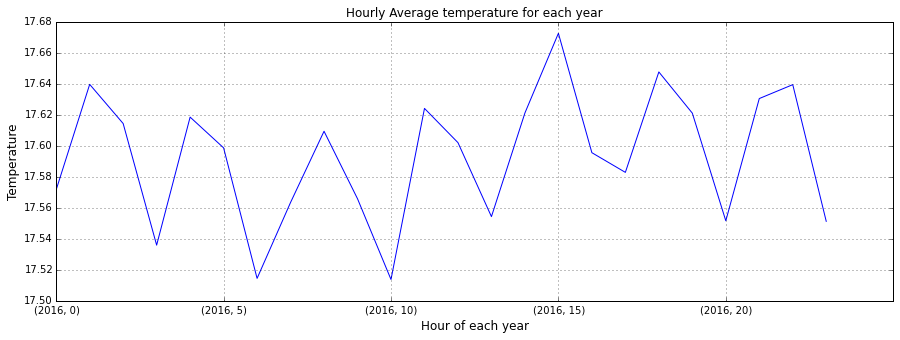

In [36]:
# Find out hourly maximum temperature for each year
year_hour_avg = pandaDF.groupby(lambda x: (x.year, x.hour)).mean()

fig, ax = plt.subplots()
plotDF = year_hour_avg[['temperature']]
plotDF.temperature.plot(figsize=(15,5), ax=ax, title='Hourly Average temperature for each year')
ax.set_xlabel("Hour of each year",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()

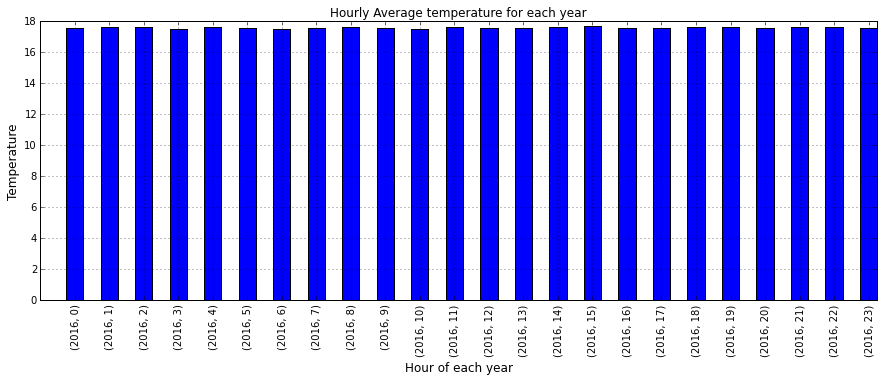

In [37]:
# draw a bar chart for hourly average temperature
fig, ax = plt.subplots()
plotDF.temperature.plot(kind='bar',figsize=(15,5), ax=ax, title='Hourly Average temperature for each year')
ax.set_xlabel("Hour of each year",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()

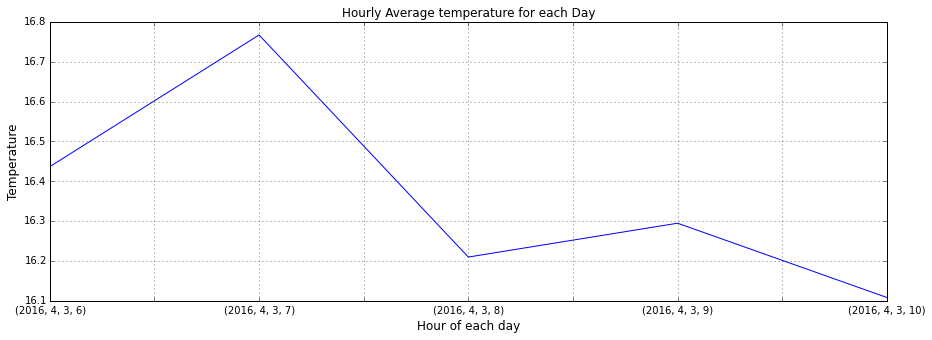

In [38]:
# retrieve the current temperature
now = datetime.now(pytz.timezone('UTC'))

# get the start time that will be behind 2 days from now, just modify "days = 2" to "hours=2" in case if
# you want to retrieve the temperature from last 2 hours

last_n_days = now - timedelta(days=22)

plotDF = pandaDF.ix[last_n_days:now]
    
# Find out hourly average temperature for each day
plotDF = plotDF.groupby(lambda x: (x.year, x.month, x.day, x.hour)).mean()

fig, ax = plt.subplots()
plotDF = plotDF[['temperature']]
plotDF.temperature.plot(figsize=(15,5), ax=ax, title='Hourly Average temperature for each Day')
ax.set_xlabel("Hour of each day",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()

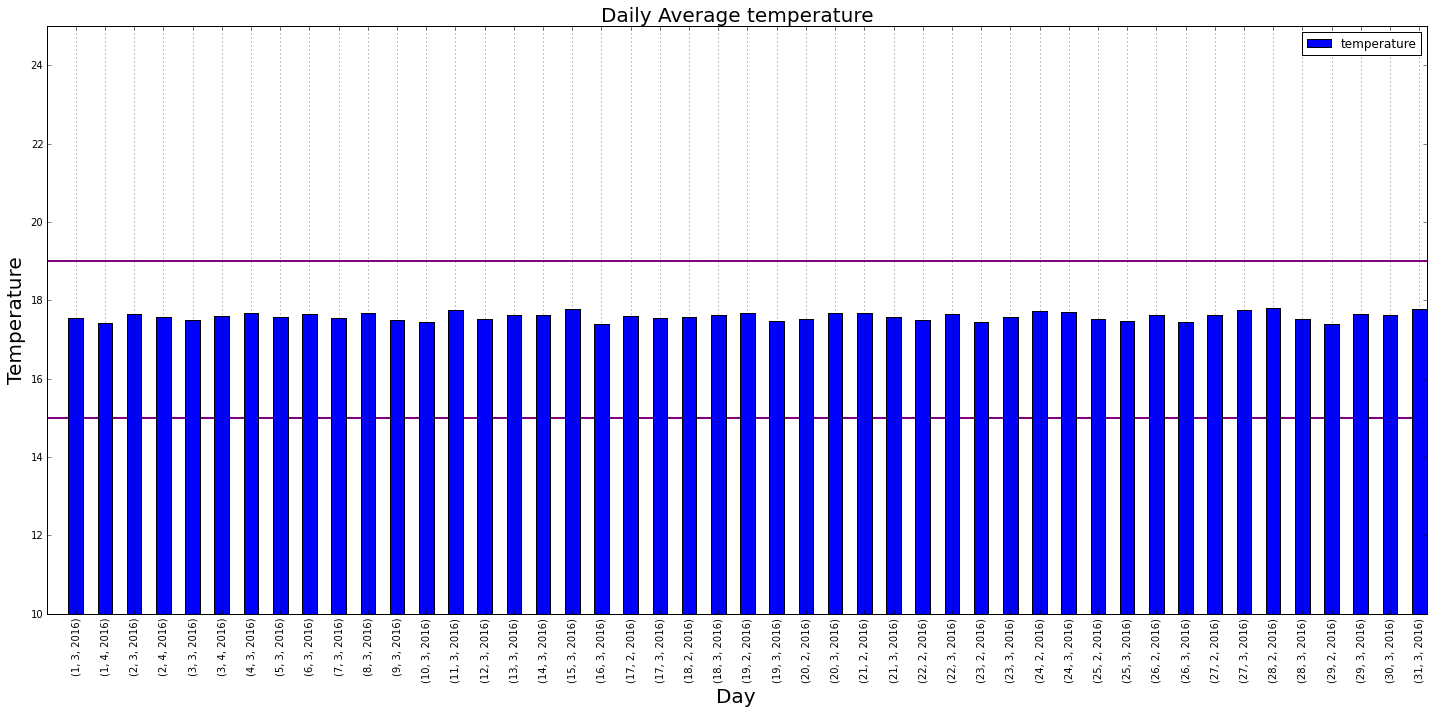

In [39]:
# Average temperature of each Day

df = pandaDF

df = df.drop(["_id"], axis=1)
df = df.drop(["_rev"], axis=1)
df = df.drop(["scaledzscore"], axis=1)
df = df.drop(["scaledwzscore"], axis=1)
df = df.drop(["timestamp"], axis=1)
df = df.drop(["forecast"], axis=1)
df = df.drop(["zscore"], axis=1)
df = df.drop(["wzscore"], axis=1)

df['Year'] = map(lambda x: x.year, df.index)
df['Month'] = map(lambda x: x.month, df.index)
df['Day'] = map(lambda x: x.day, df.index)
plotDF = df.groupby(['Day','Month','Year']).mean()

fig, ax = plt.subplots()

plotDF.plot(kind='bar', figsize=[20,10], ax=ax)

ax.axhline(y=19,c="purple",linewidth=2,zorder=0)
ax.axhline(y=15,c="purple",linewidth=2,zorder=0)
ax.set_ylim([10,25])
ax.set_title("Daily Average temperature", fontsize=20)
ax.set_xlabel("Day",fontsize=20)
ax.set_ylabel("Temperature",fontsize=20)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
plt.tight_layout()
plt.show()

In [40]:
from datetime import *
import pytz

# retrieve the current time
now = datetime.now(pytz.timezone('UTC'))

# get the start time that will be behind n days from now, just modify "days = n" to "hours = n" in case if
# you want to retrieve the temperature from last n hours

last_n_days = now - timedelta(days=30)

pandaDF.ix[last_n_days:now].temperature.mean()

17.589908761528328

In [41]:
# The following cells show how one can use the Spark SQL dataframes (instead of the Panda frames to perform similar tasks that is showcased so far)
cloudantdata.show()

+--------------------+--------------------+------------------+----------+-----------+--------------------+--------------------+--------------------+
|                 _id|                _rev|          forecast|      name|temperature|           timestamp|             wzscore|              zscore|
+--------------------+--------------------+------------------+----------+-----------+--------------------+--------------------+--------------------+
|0001683791e04032a...|1-e1fac6e387132ed...|17.530496368661147|datacenter|      17.53|2016-Mar-14 14:28:00| -0.3973792127656496|-0.06220487912208...|
|000466810f774d138...|1-86b2d61725df632...|17.410066923542807|datacenter|      17.47|2016-Feb-29 19:22:00|  0.2921336362254525|  0.2466479490876011|
|0004fef3c82f4f23a...|1-725360471a4d542...| 17.47009721734814|datacenter|       17.5|2016-Feb-20 03:30:00| 0.48290920856417846|-0.29328845788984875|
|0005c9331e3b4a879...|1-de5a76b4d2cabf2...|17.117949682964625|datacenter|      17.21|2016-Feb-28 11:00:00|

In [42]:
cloudantdata.groupBy().avg('temperature').collect()

[Row(avg(temperature)=17.593230723955767)]

In [43]:
cloudantdata.describe().show()

+-------+------------------+------------------+-------------------+--------------------+
|summary|          forecast|       temperature|            wzscore|              zscore|
+-------+------------------+------------------+-------------------+--------------------+
|  count|             33980|             33980|              33980|               33980|
|   mean|17.578985991428283|17.593230723955767|0.14925002784812186|-0.05697783626883356|
| stddev|0.5702095220577977|0.5821221526686385| 1.3137063816497094|   1.298055491798131|
|    min|  15.9590688881009|             15.78| -6.844595645363803|  -9.494323210518395|
|    max|19.186892981329667|             19.78| 11.167243798058735|   8.288218283891341|
+-------+------------------+------------------+-------------------+--------------------+



In [44]:
cloudantdata.groupBy().max('temperature').collect()

[Row(max(temperature)=19.78)]

In [45]:
cloudantdata.groupBy().min('temperature').collect()

[Row(min(temperature)=15.78)]

In [46]:
cloudantdata.count()

33980

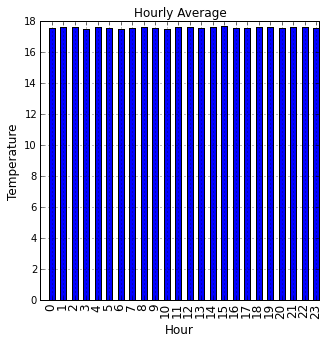

In [47]:
from datetime import *
from pyspark.sql.functions import *
from pyspark.sql.types import *

def string_to_timestamp(datestring):
    return datetime.strptime(datestring, "%Y-%b-%d %H:%M:%S").isoformat()

toTimestampFunc = udf(string_to_timestamp, StringType())

df = cloudantdata.select('temperature','timestamp')

featureDf = df.withColumn("timestamp", toTimestampFunc(df['timestamp']))

featureDf.groupBy(hour("timestamp").alias("hour")).count().collect()

from pyspark.sql.functions import hour, mean


hourlyAvg = featureDf.groupBy(hour("timestamp").alias("hour")).agg(avg("temperature").alias("average"))

import matplotlib.pyplot as plt
import pandas as pd
hpandaDF = hourlyAvg.toPandas()

ax = hpandaDF.plot(kind='bar', x='hour', y='average', title ="Hourly Average",figsize=(5,5),legend=True, fontsize=12)
ax.set_xlabel("Hour",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()


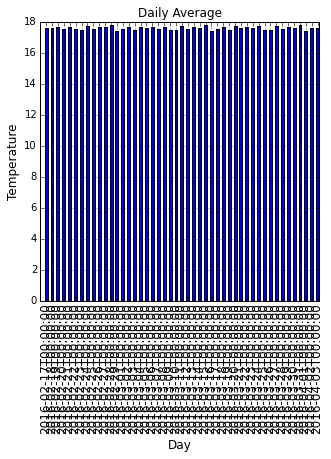

In [48]:
from pyspark.sql.functions import hour, dayofyear
from pyspark.sql.types import *
from datetime import *

dailyAvg = featureDf.groupBy(dayofyear("timestamp").alias("day")).agg(avg("temperature").alias("average"))

def day_to_year(days):
    return (datetime(2016, 1, 1) + timedelta(days - 1)).isoformat()

dayToYearFunc = udf(day_to_year, StringType())

dailyAvg = dailyAvg.withColumn("Days", dayToYearFunc(dailyAvg['day']))

import matplotlib.pyplot as plt
import pandas as pd
dpandaDF = dailyAvg.toPandas()

ax = dpandaDF.plot(kind='bar', x='Days', y='average', title ="Daily Average",figsize=(5,5),legend=True, fontsize=12)
ax.set_xlabel("Day",fontsize=12)
ax.set_ylabel("Temperature",fontsize=12)
plt.show()


In [49]:
from datetime import *
from pyspark.sql.functions import *
import pytz

def in_last_n_minutes(now, mins):
    def _in_last_n_minutes(then):
        then_parsed = datetime.strptime(then, "%Y-%b-%d %H:%M:%S")
        return then_parsed > datetime.strptime(str(now)[:-6], "%Y-%m-%d %H:%M:%S.%f") - timedelta(minutes=mins)
    return udf(_in_last_n_minutes, BooleanType())
    

now = datetime.now(pytz.timezone('UTC'))
print 'current time ' + str(now)
df = cloudantdata.select('temperature','timestamp').dropna()
timeDF = df.where(in_last_n_minutes(now, 60)(col("timestamp")))

timeDF.groupBy().avg('temperature').collect()

current time 2016-04-25 06:49:21.010463+00:00


[Row(avg(temperature)=None)]